# SKMS evaluation

In [2]:
#Importing essentials
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import norm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import normalize


## Experimental values

In [3]:
#importing from experimental file
# Num Nuc  A   N   Z        E        E/A     dE     Eval    S1n     dS1n  Eval    
# 0   1    2   3   4        5        6       7      8       9       10    11

#S1p     dS1p  Eval    S2n     dS2n  Eval    S2p     dS2p  Eval
#12      13    14      15      16    17      18      19    20

N_exp  = np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=3) #Number of neutrons
Z_exp  = np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=4) #Number of protons
X_exp  = np.transpose(np.stack((Z_exp,N_exp)))
A_exp  = N_exp+Z_exp # Total number of Nucleons

# Difference between the experimental binding energy and the Liquid drop model
y_exp  = -np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=5)
dy_exp = -np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=7)

S_p_exp  = -np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=12)
S_2p_exp = -np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=18)

S_n_exp =-np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=9)
S_2n_exp=-np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=15)

y_exp_d={}
for i in range(0,len(N_exp)):
    y_exp_d[Z_exp[i], N_exp[i]]=y_exp[i]
    

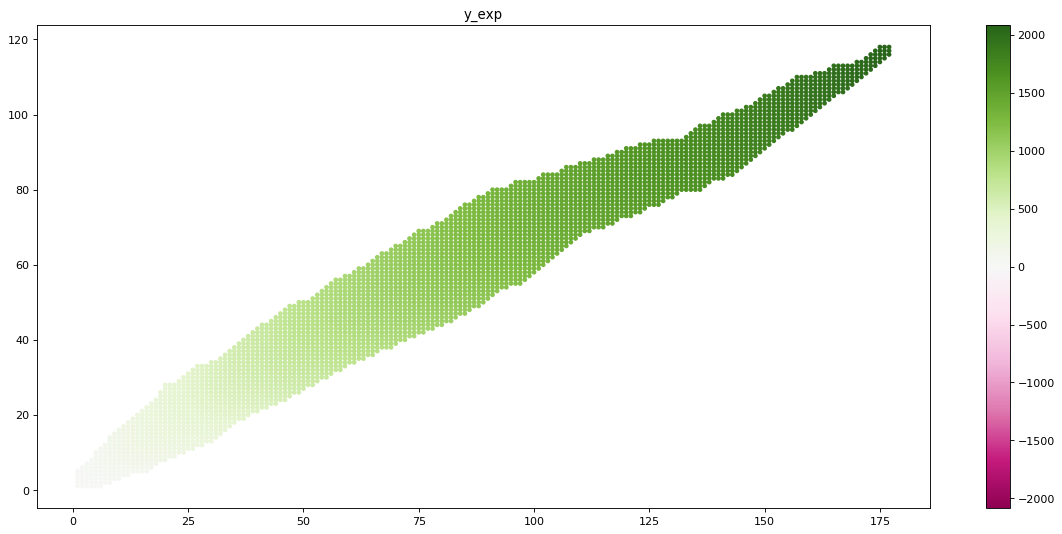

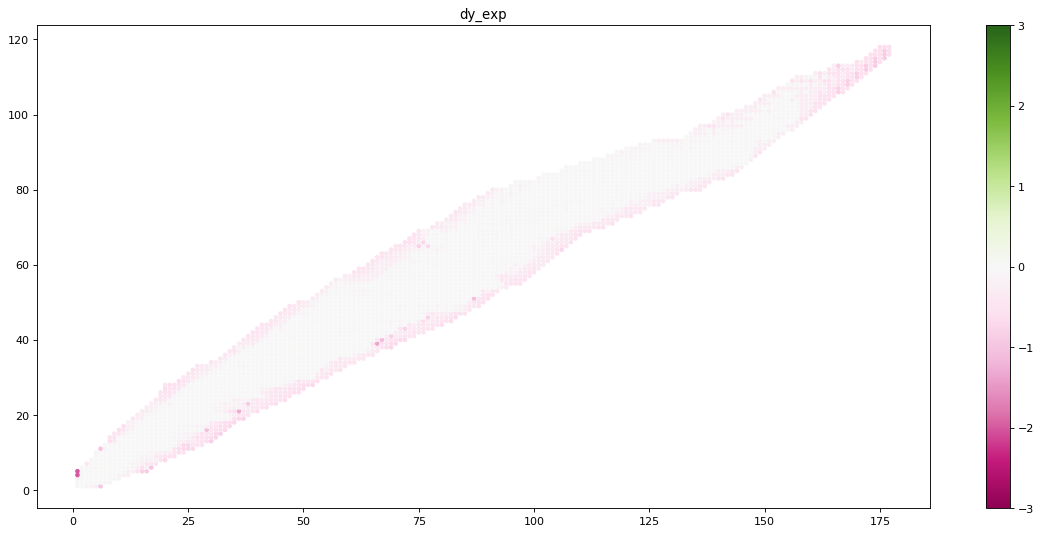

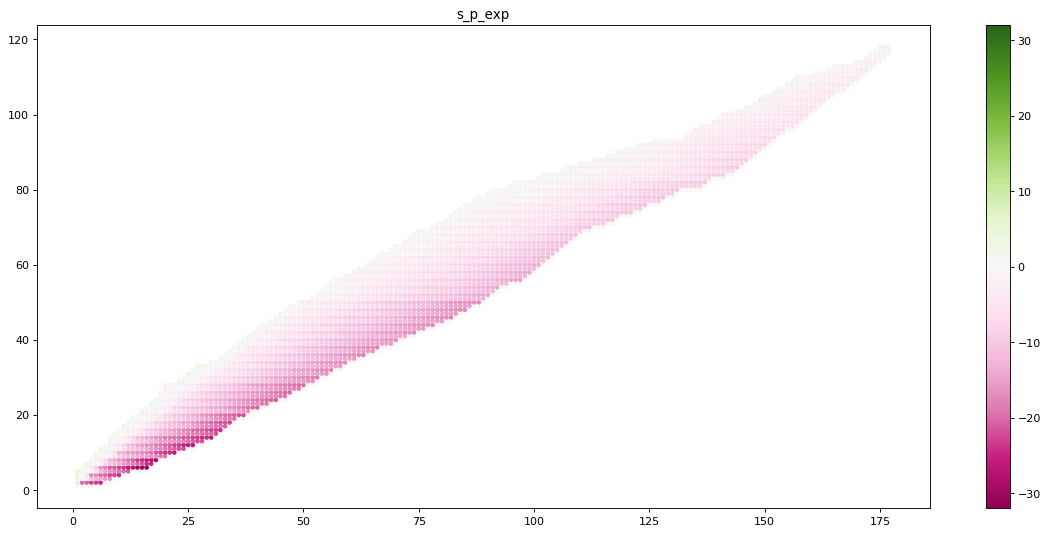

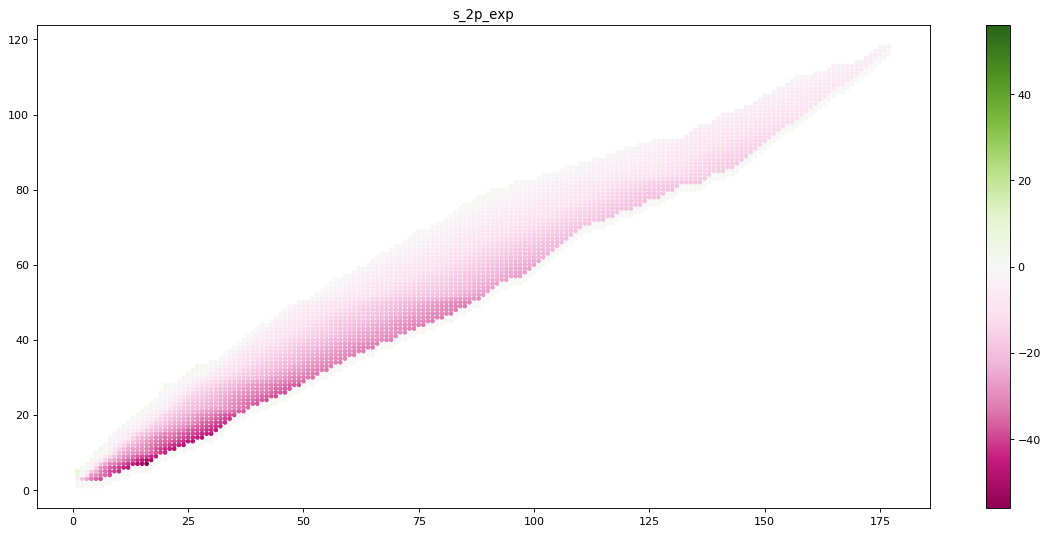

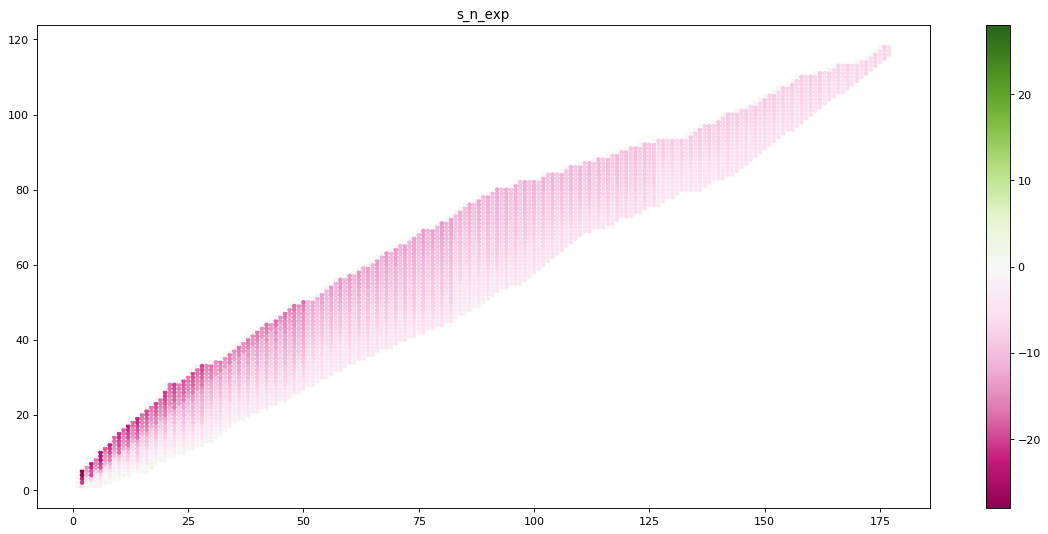

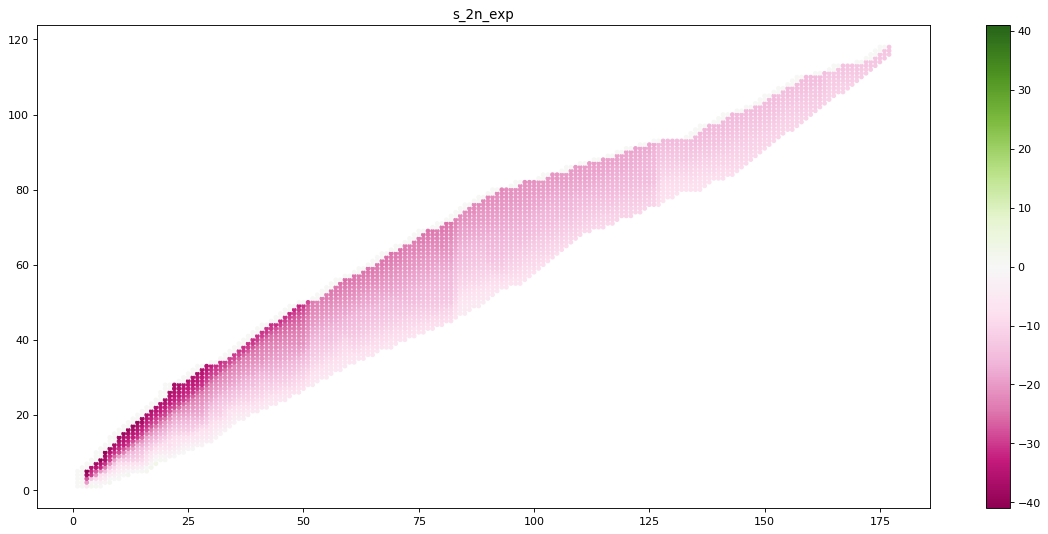

In [4]:
ext = np.int(np.ceil(max(-np.min(y_exp),np.max(y_exp))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(N_exp,Z_exp,c=y_exp,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.title('y_exp')
plt.colorbar(sc)
plt.show()

ext = np.int(np.ceil(max(-np.min(dy_exp),np.max(dy_exp))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(N_exp,Z_exp,c=dy_exp,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.title('dy_exp')
plt.colorbar(sc)
plt.show()


ext = np.int(np.ceil(max(-np.min(S_p_exp),np.max(S_p_exp))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(N_exp,Z_exp,c=S_p_exp,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.title('s_p_exp')
plt.colorbar(sc)
plt.show()


ext = np.int(np.ceil(max(-np.min(S_2p_exp),np.max(S_2p_exp))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(N_exp,Z_exp,c=S_2p_exp,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.title('s_2p_exp')
plt.colorbar(sc)
plt.show()


ext = np.int(np.ceil(max(-np.min(S_n_exp),np.max(S_n_exp))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(N_exp,Z_exp,c=S_n_exp,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.title('s_n_exp')
plt.colorbar(sc)
plt.show()


ext = np.int(np.ceil(max(-np.min(S_2n_exp),np.max(S_2n_exp))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(N_exp,Z_exp,c=S_2n_exp,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.title('s_2n_exp')
plt.colorbar(sc)
plt.show()



Current size: [15.0, 12.0]


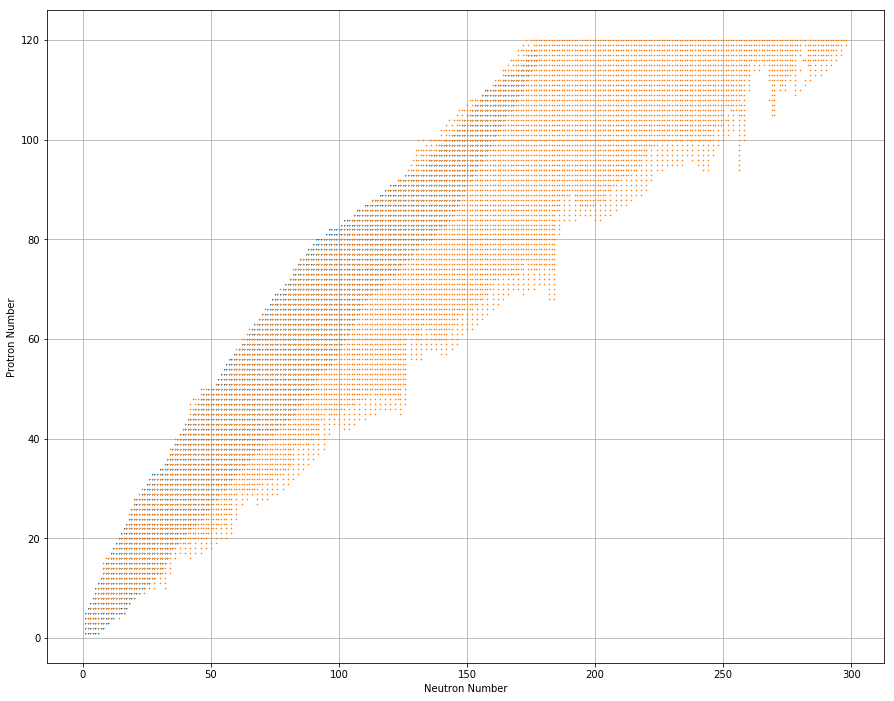

In [7]:
#SKMS importing relevent data
#Symbol Z  N A Binding_Energy_(MeV)  S_p_(MeV)  S_{2p}_(MeV) S_n_(MeV)  S_{2n}_(MeV) Q_{alpha}_(MeV)       
#0      1  2 3 4                     5          6            7          8            9

Z_SKMS    = np.genfromtxt('SKMS_all_nuclei-new.dat',usecols=1) #Number of protons

N_SKMS    = np.genfromtxt('SKMS_all_nuclei-new.dat',usecols=2) #Number of neutrons

A_SKMS    = N_SKMS+Z_SKMS                                      #Total number of Nucleons

y_SKMS    = -np.genfromtxt('SKMS_all_nuclei-new.dat',usecols=4)

S_p_SKMS  = -np.genfromtxt('SKMS_all_nuclei-new.dat',usecols=5)

S_2p_SKMS = -np.genfromtxt('SKMS_all_nuclei-new.dat',usecols=6)

S_n_SKMS  = -np.genfromtxt('SKMS_all_nuclei-new.dat',usecols=7)

S_2n_SKMS = -np.genfromtxt('SKMS_all_nuclei-new.dat',usecols=8)

Q_SKMS    = -np.genfromtxt('SKMS_all_nuclei-new.dat',usecols=9)

S_p_SKMS  = np.where(np.isnan(S_p_SKMS), 0, S_p_SKMS)

S_2p_SKMS = np.where(np.isnan(S_2p_SKMS), 0, S_2p_SKMS)

S_n_SKMS  = np.where(np.isnan(S_n_SKMS), 0, S_n_SKMS)

S_2n_SKMS = np.where(np.isnan(S_2n_SKMS), 0, S_2n_SKMS)

Q_SKMS=np.where(np.isnan(Q_SKMS), 0, Q_SKMS)

X_SKMS    = np.transpose(np.stack((Z_SKMS, N_SKMS, A_SKMS, y_SKMS, S_p_SKMS, S_2p_SKMS, S_n_SKMS, S_2n_SKMS, Q_SKMS)))

y_SKMS_d={}
S_p_SKMS_d={}
S_2p_SKMS_d={}
S_n_SKMS_d={}
S_2n_SKMS_d={}
Q_SKMS_d={}

for i in range(0,len(X_SKMS)):
    y_SKMS_d[Z_SKMS[i], N_SKMS[i]]=y_SKMS[i]
    S_p_SKMS_d[Z_SKMS[i], N_SKMS[i]]=S_p_SKMS[i]
    S_2p_SKMS_d[Z_SKMS[i], N_SKMS[i]]=S_2p_SKMS[i]
    S_n_SKMS_d[Z_SKMS[i], N_SKMS[i]]=S_n_SKMS[i]
    S_2n_SKMS_d[Z_SKMS[i], N_SKMS[i]]=S_2n_SKMS[i]
    Q_SKMS_d[Z_SKMS[i], N_SKMS[i]]=Q_SKMS[i]

    
    


X_SKMS=np.transpose(X_SKMS)


# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)

# Set figure width to 12 and height to 9
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size






plt.plot(N_exp[0:-1],  Z_exp[0:-1], '+', markersize=1, label='experimental')
plt.plot(N_SKMS[0:-1], Z_SKMS[0:-1],  'x', markersize=1, label='SKMS')
plt.xlabel('Neutron Number')
plt.ylabel('Protron Number')
plt.grid(True)
plt.show()

X_SKMS=np.transpose(X_SKMS)

## SKMS theoretical values graphed

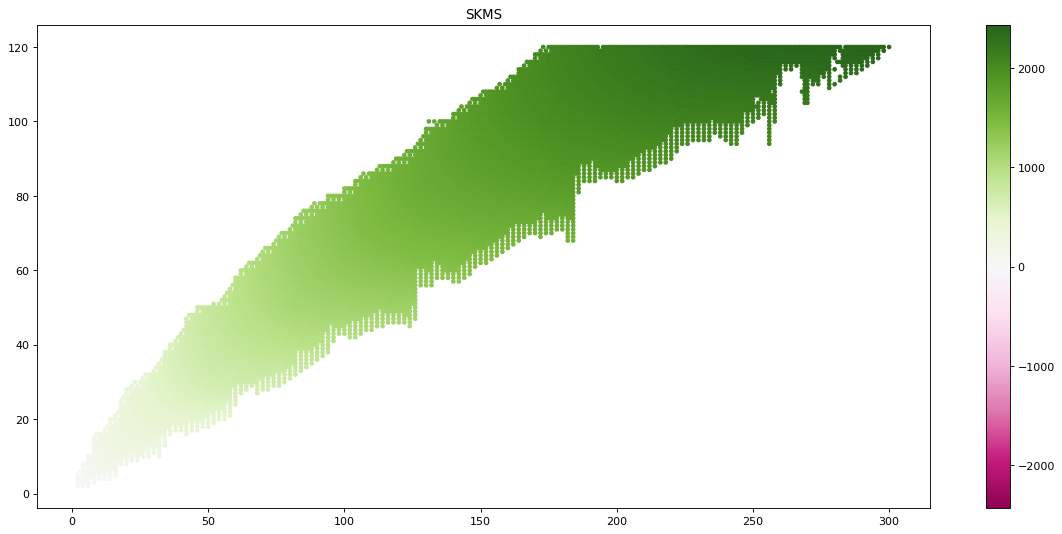

In [8]:
ext = np.int(np.ceil(max(-np.min(y_SKMS),np.max(y_SKMS))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(N_SKMS,Z_SKMS,c=y_SKMS,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.title('SKMS')
plt.colorbar(sc)
plt.show()



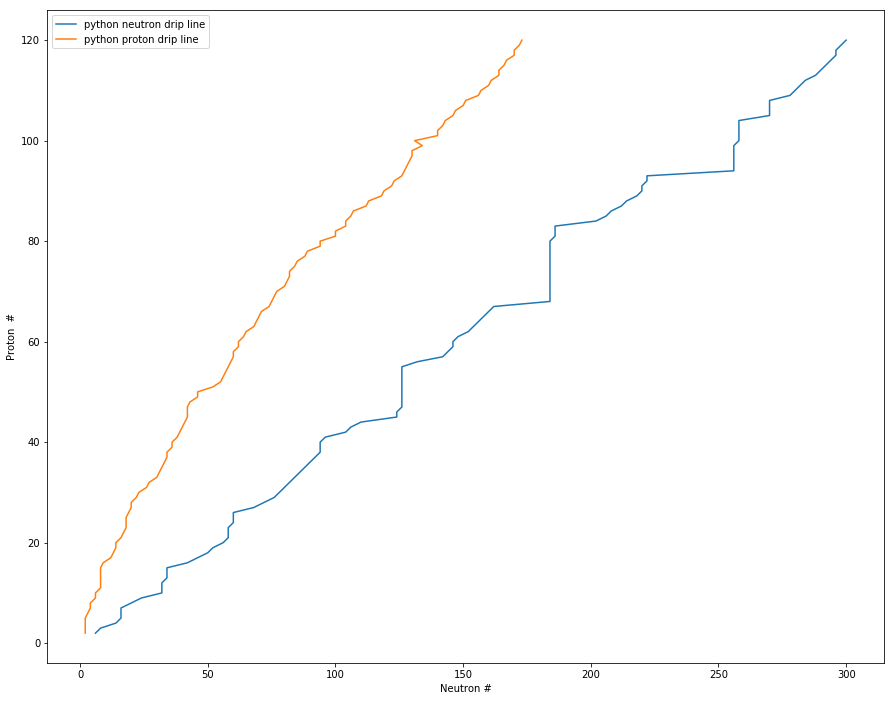

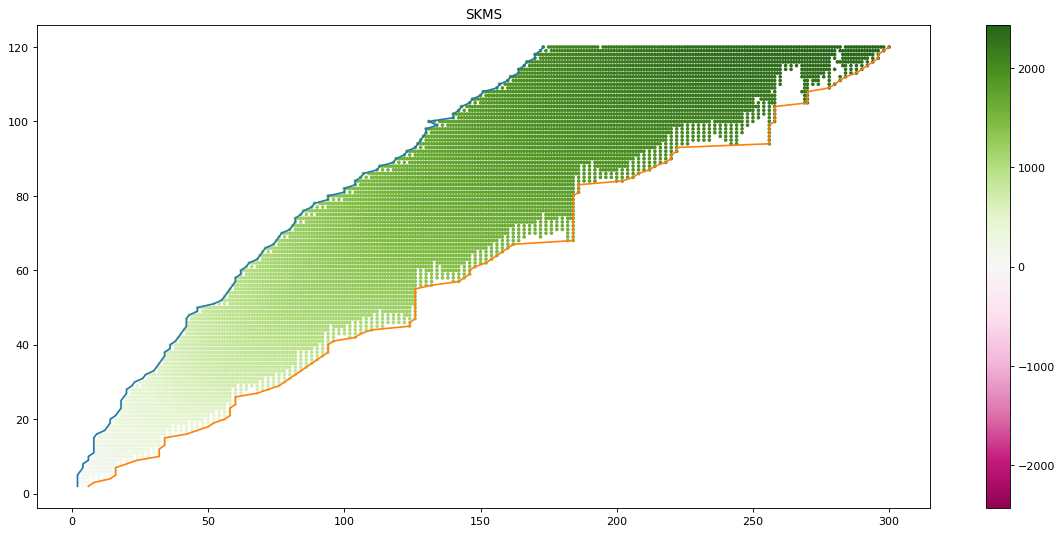

In [9]:
#X_SKMS    = np.transpose(np.stack((Z_SKMS, N_SKMS, A_SKMS, y_SKMS, S_p_SKMS, S_2p_SKMS, S_n_SKMS, S_2n_SKMS, Q_SKMS)))
ndrip_SKMS=[]
zdep_SKMS=[]

zdrip_SKMS=[]
ndep_SKMS=[]


for i in range(0,len(X_SKMS)):
    try:
        if X_SKMS[i-1][0] != X_SKMS[i][0]:
            #print(X_SKMS[i][0]) 
            zdrip_SKMS.append(X_SKMS[i][0])
            ndep_SKMS.append(X_SKMS[i][1])
    
    except IndexError:
        #print('except', i,  X_SKMS[i][0])
        zdrip_SKMS.append(X_SKMS[i-1][0])
        ndep_SKMS.append(X_SKMS[i-1][1])
             
for i in range(2,len(X_SKMS)):
    try:
        if X_SKMS[i+1][0] != X_SKMS[i][0]:
            #print(X_SKMS[i][0]) 
            ndrip_SKMS.append(X_SKMS[i][1])
            zdep_SKMS.append(X_SKMS[i][0])
        
    except IndexError:
        #print('except', i,  X_SKMS[i][0])
        ndrip_SKMS.append(X_SKMS[i][1])
        zdep_SKMS.append(X_SKMS[i][0])
    
    
zdrip_SKMS.append(X_SKMS[8576][1])
ndep_SKMS.append(X_SKMS[8576][0])

ndrip_SKMS.append(X_SKMS[2699][1])
zdep_SKMS.append(X_SKMS[2699][0])
        

zdripndep_SKMS = np.transpose(np.stack((zdrip_SKMS,ndep_SKMS )))
ndripzdep_SKMS = np.transpose(np.stack((ndrip_SKMS,zdep_SKMS )))


plt.plot(np.transpose(ndripzdep_SKMS)[0][0:-1], np.transpose(ndripzdep_SKMS)[1][0:-1],label='python neutron drip line')
plt.plot(np.transpose(zdripndep_SKMS)[1][0:-1], np.transpose(zdripndep_SKMS)[0][0:-1],label='python proton drip line')
plt.ylabel('Proton  #')
plt.xlabel('Neutron #')
plt.legend()
plt.show()


ext = np.int(np.ceil(max(-np.min(y_SKMS),np.max(y_SKMS))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(N_SKMS,Z_SKMS,c=y_SKMS,cmap='PiYG',vmin=-ext,vmax=ext,s=5)
plt.plot(np.transpose(zdripndep_SKMS)[1][0:-1], np.transpose(zdripndep_SKMS)[0][0:-1],label='python proton drip line')
plt.plot(np.transpose(ndripzdep_SKMS)[0][0:-1], np.transpose(ndripzdep_SKMS)[1][0:-1],label='python neuton drip line')
plt.title('SKMS')
plt.colorbar(sc)
plt.show()


## Q_SKMS values graphed

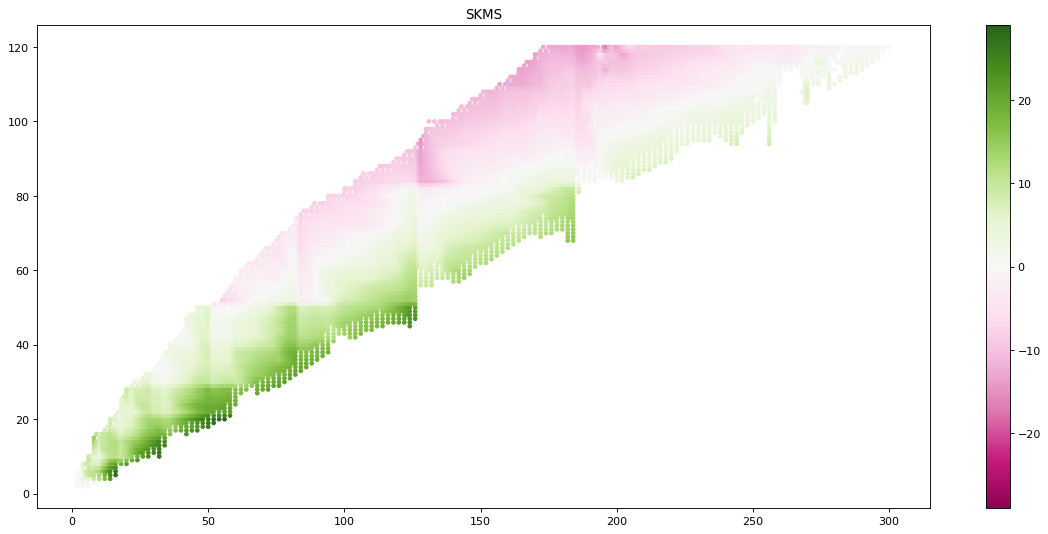

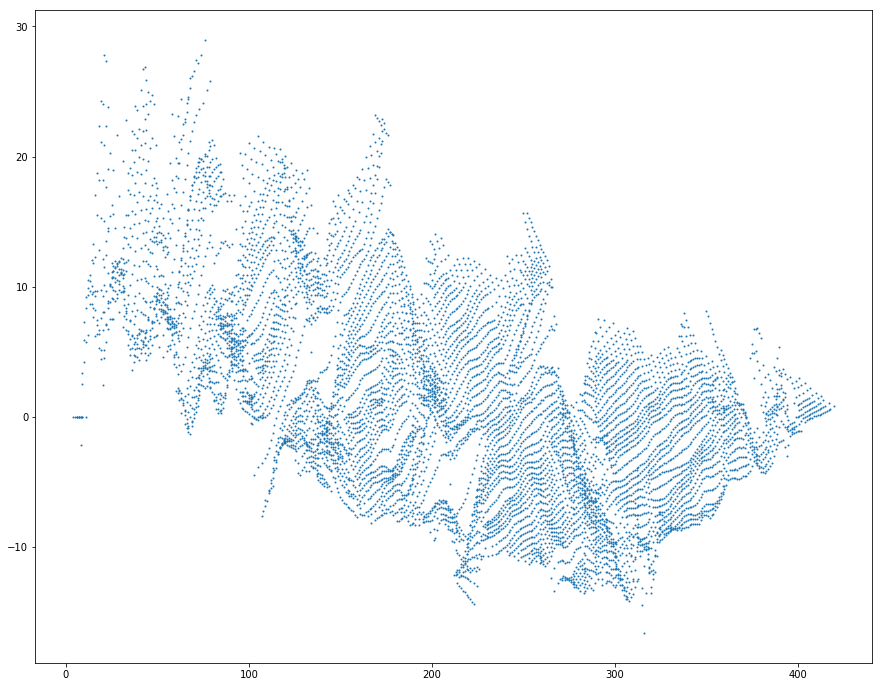

In [10]:
ext = np.int(np.ceil(max(-np.min(Q_SKMS),np.max(Q_SKMS))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(N_SKMS,Z_SKMS,c=Q_SKMS,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.title('SKMS')
plt.colorbar(sc)
plt.show()

plt.plot(N_SKMS+Z_SKMS, Q_SKMS, 'o', markersize=1)
plt.show()

# Q against be
#distinguish theoretical and exp

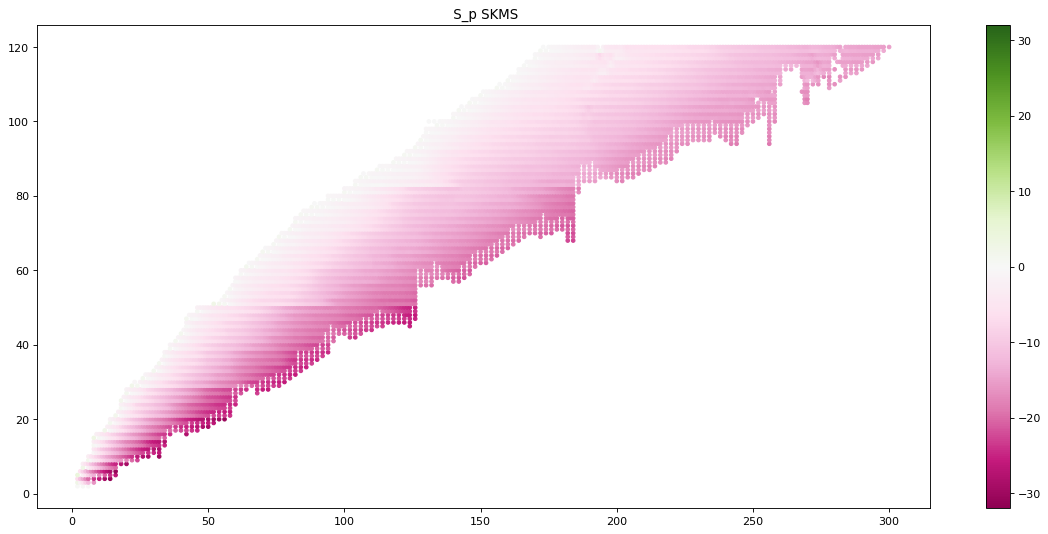

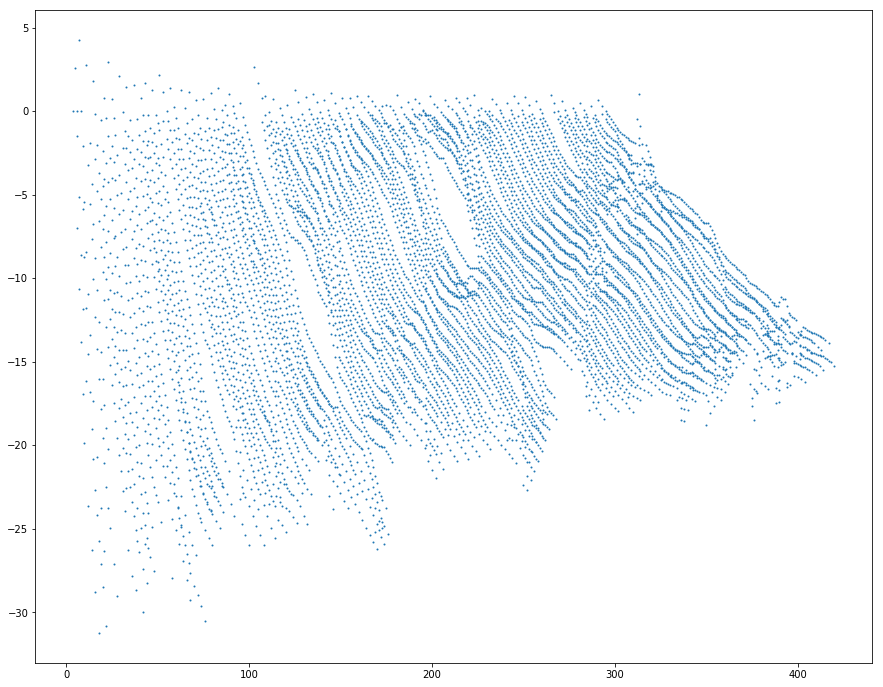

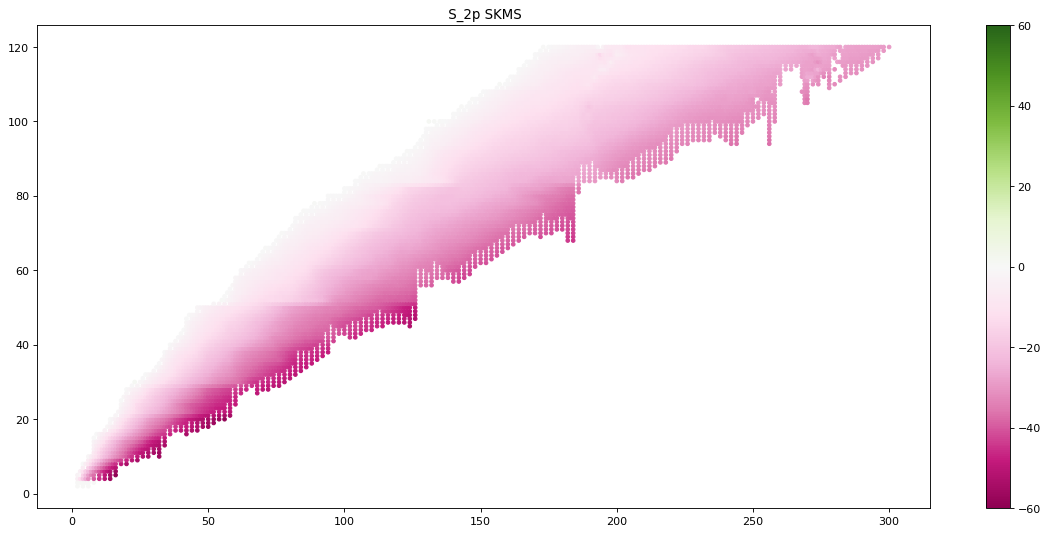

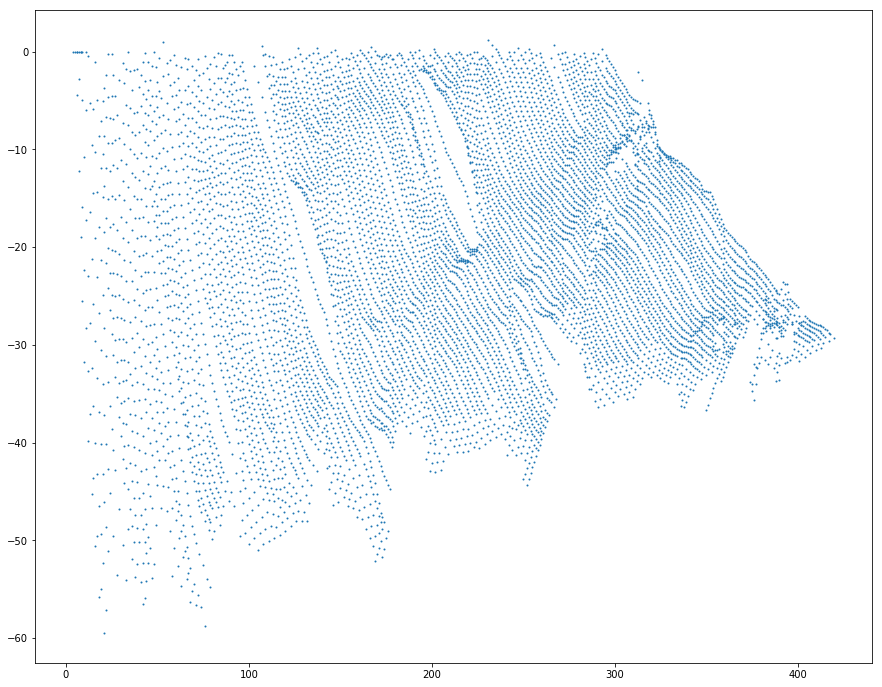

In [11]:
ext = np.int(np.ceil(max(-np.min(S_p_SKMS),np.max(S_p_SKMS))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(N_SKMS,Z_SKMS,c=S_p_SKMS,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.title(' S_p SKMS')
plt.colorbar(sc)
plt.show()


plt.plot(N_SKMS+Z_SKMS, S_p_SKMS, 'o', markersize=1)
plt.show()

#2p separation energy value

ext = np.int(np.ceil(max(-np.min(S_2p_SKMS),np.max(S_2p_SKMS))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(N_SKMS,Z_SKMS,c=S_2p_SKMS,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.title(' S_2p SKMS')
plt.colorbar(sc)
plt.show()

plt.plot(N_SKMS+Z_SKMS, S_2p_SKMS, 'o', markersize=1)
plt.show()


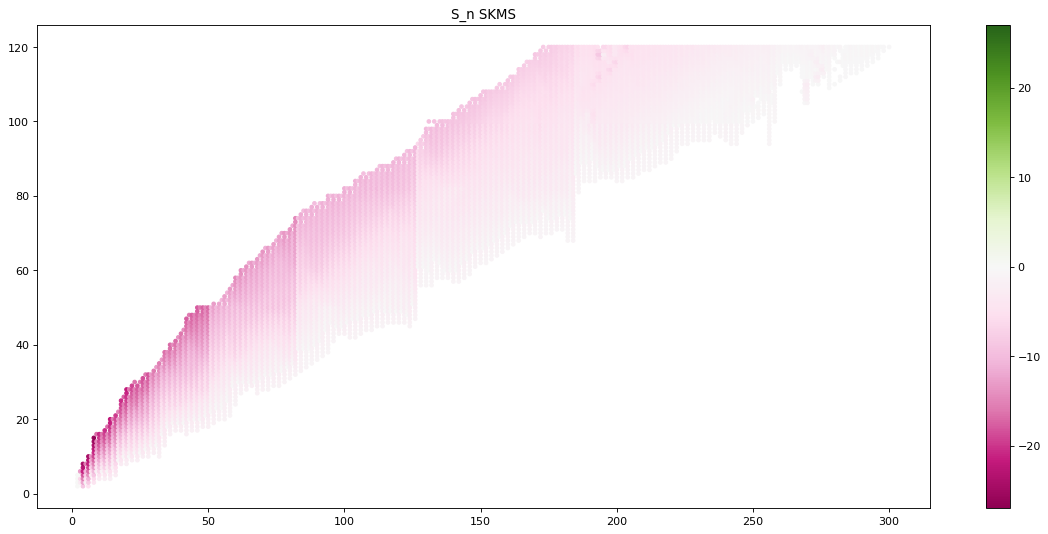

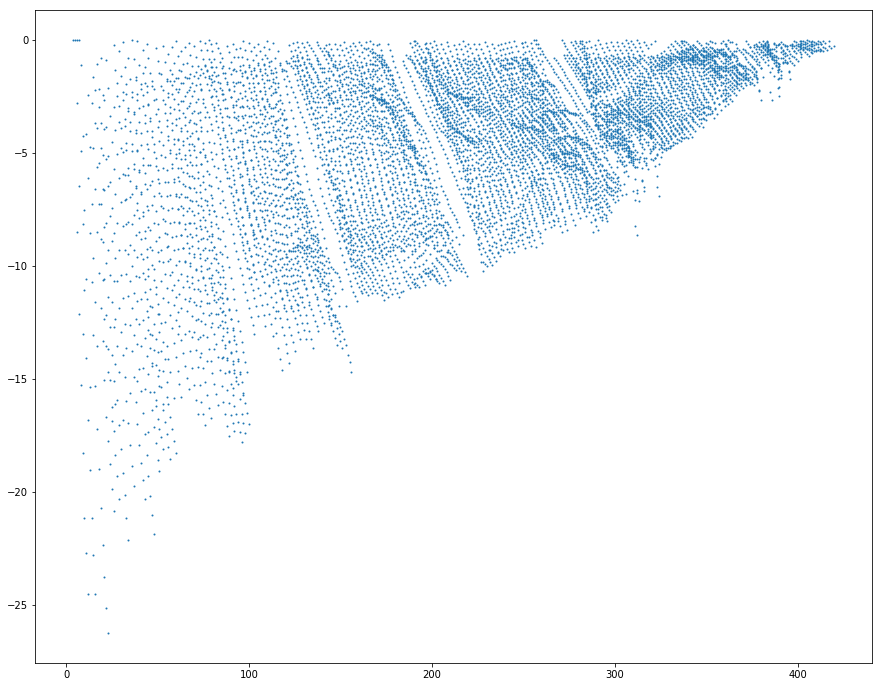

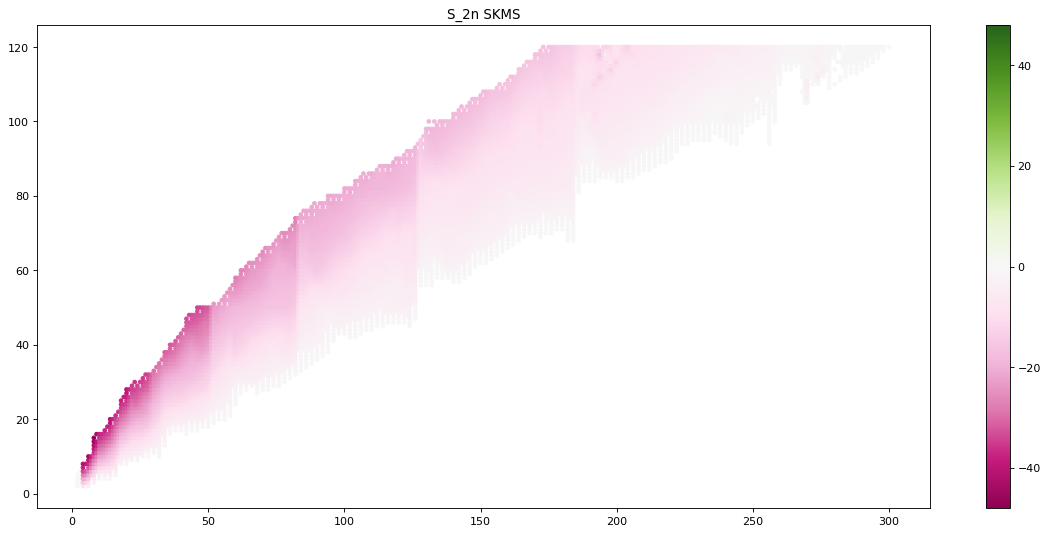

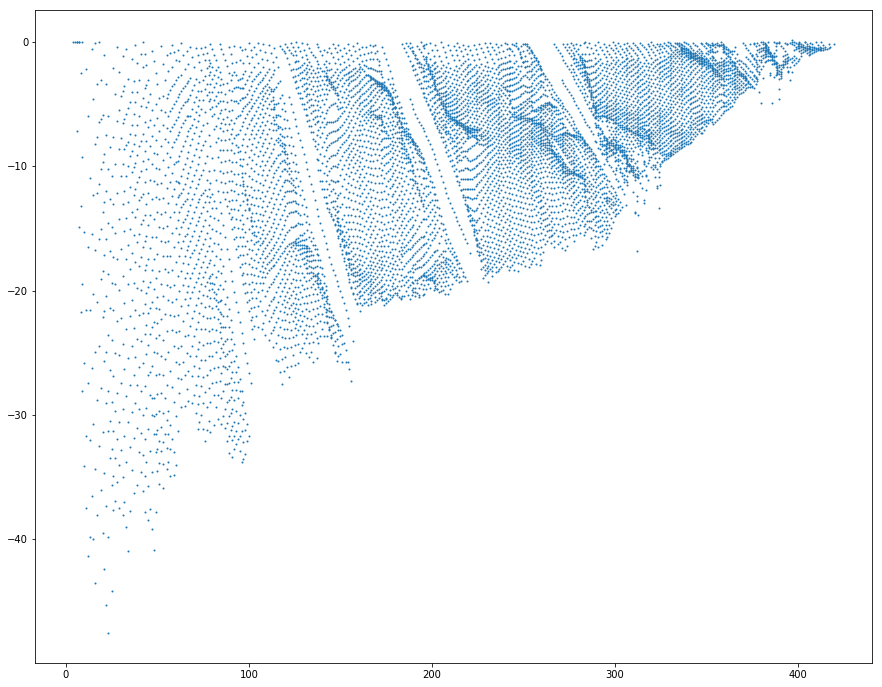

In [12]:
ext = np.int(np.ceil(max(-np.min(S_n_SKMS),np.max(S_n_SKMS))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(N_SKMS, Z_SKMS, c=S_n_SKMS,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.title('S_n SKMS')
plt.colorbar(sc)
plt.show()

plt.plot(N_SKMS+Z_SKMS, S_n_SKMS, 'o', markersize=1)
plt.show()

ext = np.int(np.ceil(max(-np.min(S_2n_SKMS),np.max(S_2n_SKMS))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(N_SKMS, Z_SKMS, c=S_2n_SKMS,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.title('S_2n SKMS')
plt.colorbar(sc)
plt.show()

plt.plot(N_SKMS+Z_SKMS, S_2n_SKMS, 'o', markersize=1)
plt.show()

#Sn=[]
#for N in range(Nmin, Nmax)
nlinst.append(N)



In [13]:
X_matSKMS      =[]
y_matSKMS      =[]
y_expSKMS      =[]



for exp in range(1, len(X_exp)):
    #print('exp',exp)
    for the in range(0, len(X_SKMS)):      #len(X_SKMS)):
        if X_exp[exp][0]==X_SKMS[the][0] and X_exp[exp][1]==X_SKMS[the][1]:
            X_matSKMS.append(X_exp[exp])
            y_matSKMS.append(y_SKMS[the])
            y_expSKMS.append(y_exp[exp])
            break

0.9286337563219553
-10.38211719389363
[12.72157100000004, 11.48181199999999, 11.33513199999993, 10.428846999999905, 9.373923999999988, 6.243883000000096, 4.7643379999999524] 

[11.86681865 11.64314865 11.64563761 10.45192326  9.79992467  7.00392283
  5.96666193] 

[  85.4752346  -16.1336655  -31.0505615   -2.3076265  -42.6000666
  -76.003983  -120.232393 ] 



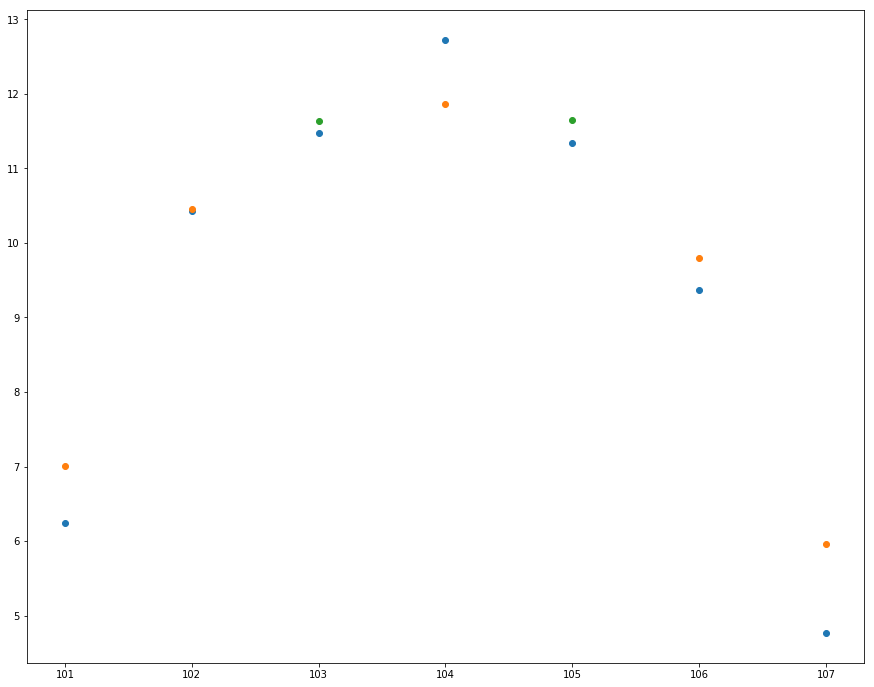

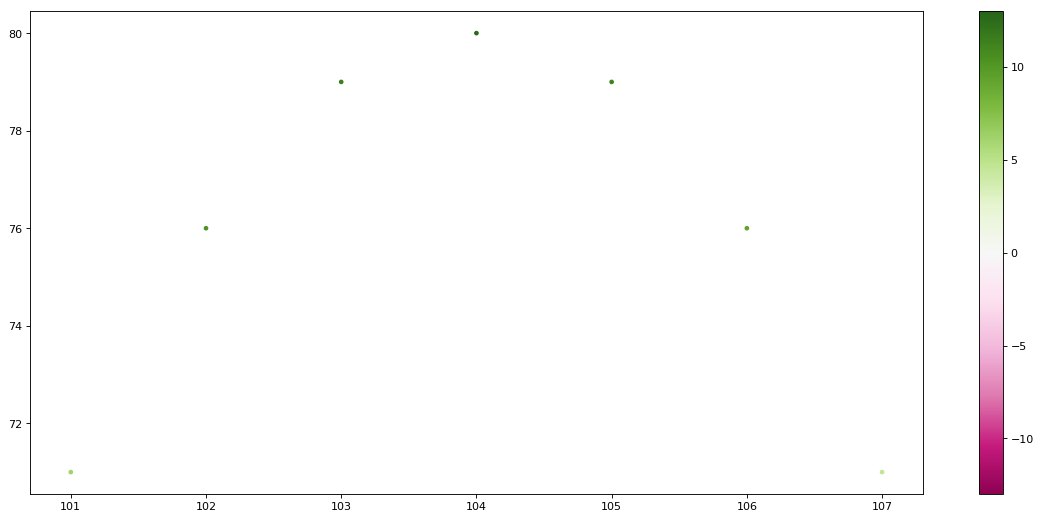

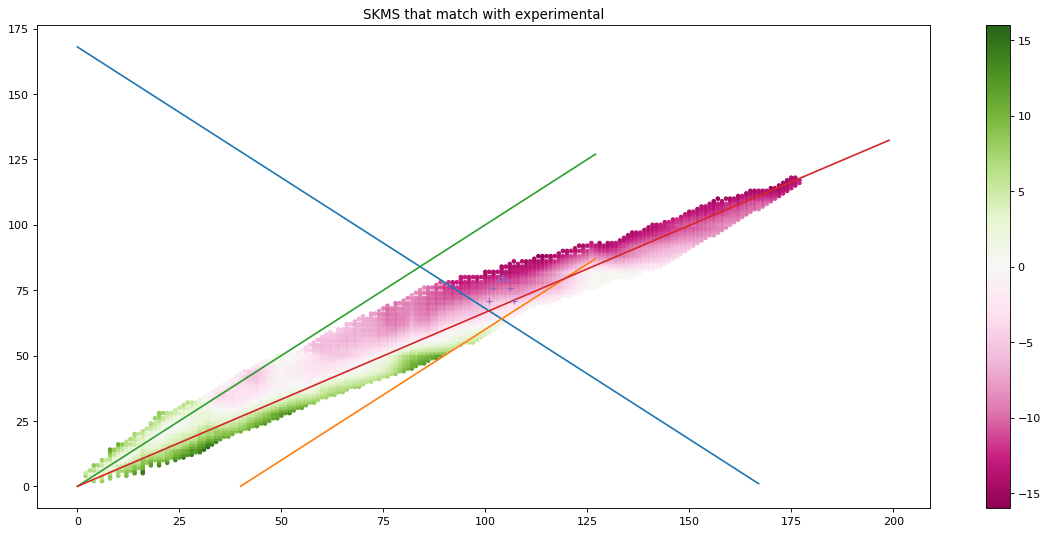

In [14]:
y_matSKMS=np.array(y_matSKMS)            
y_expSKMS=np.array(y_expSKMS)            

#ext = np.int(np.ceil(max(-np.min(y_matSKMS),np.max(y_matSKMS))))
#fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
#sc = plt.scatter(np.transpose(X_matSKMS)[1],np.transpose(X_matSKMS)[0],c=y_matSKMS,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
#plt.title('SKMS that match with experimental')
#plt.colorbar(sc)
#plt.show()


y_err=y_matSKMS-y_expSKMS

#print(np.shape(y_err))

#print(np.shape(np.transpose(X_matSKMS)[1]))


"""
ext = np.int(np.ceil(max(-np.min(y_err[1500:3000]),np.max(y_err[1500:3000]))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X_matSKMS)[1][1500:3000],np.transpose(X_matSKMS)[0][1500:3000],c=y_err[1500:3000],cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.plot(123,80, 'x', markersize=6)
plt.title('SKMS that match with experimental')
plt.colorbar(sc)
plt.show()
"""

x_val=range(114,114+9)
y_val=range(80,89)
xy_val=np.transpose(np.stack((x_val,y_val)))

#print(xy_val)
be_val=[]
for i in range(0,9):
    be_val.append(y_exp_d[y_val[i], x_val[i]]-y_SKMS_d[y_val[i], x_val[i]])
    #print(xy_val[i])
    #print(y_exp_d[y_val[i], x_val[i]])
    #print(y_SKMS_d[ y_val[i],x_val[i]] )

    
line=[]
i_val=range(0,168)  #115,128
for i in range(0,168):
    line.append(168-i)
    
    
"""

xy_val=np.transpose(np.stack((i_val,line)))

be_val=[]
for i in range(0,128-115):
    be_val.append(y_exp_d[line[i], i_val[i]]-y_SKMS_d[line[i], i_val[i]])
"""
diag=[]
diag_x=range(0,128)
for i in range(0,128):
    diag.append(i)
    
diag_aug=[]
diag_aug_x=range(0,200)
for i in range(0,200):
    diag_aug.append(0.665*i)
    



line_p=[]
i_p_val=range(40,128)
for i in range(40,128):
    line_p.append(i-40)
    
   

  
curve_x=[104,103,105,102,106,101,107]        #=[98,97,99,101,105,114,96]#   ,95]
curve_y=[80, 79, 79, 76, 76, 71, 71]        #=[70,69,71,72 ,73 ,74 ,67]#   ,63]

curve_xy=np.transpose(np.stack((curve_x,curve_y)))


curve_be=[]
for i in range(0,len(curve_xy)):
    curve_be.append(y_exp_d[curve_y[i], curve_x[i]]-y_SKMS_d[curve_y[i], curve_x[i]])


rf_rethink=RandomForestRegressor(n_estimators=1000)
X_train, X_test, y_train, y_test = train_test_split(curve_xy, curve_be, test_size =0.25) #, random_state=42 )


rf_rethink.fit(X_train,y_train)

print(rf_rethink.score(X_train, y_train))
print(rf_rethink.score(X_test, y_test))

curve_diff=curve_be-rf_rethink.predict(curve_xy)

#curve_diff=np.transpose(curve_diff)

print(curve_be, '\n')
print(rf_rethink.predict(curve_xy), '\n')
print(curve_diff*100, '\n')

#for i in range(0,6):
#    print('i:', i, ' diff:' curve_diff[i])

#plt.plot(np.transpose(curve_xy)[0]+np.transpose(curve_xy)[1],curve_diff, 'o', label='actual')
#plt.show()

#plt.plot(np.transpose(curve_xy)[0]+np.transpose(curve_xy)[1],curve_be, 'o', label='actual')
#plt.plot(np.transpose(X_train)[0]+np.transpose(X_train)[1], rf_rethink.predict(X_train), 'o', label='train')
#plt.plot(np.transpose(X_test)[0]+np.transpose(X_test)[1], rf_rethink.predict(X_test), 'o', label='test')
#plt.show()


plt.plot(np.transpose(curve_xy)[0],curve_be, 'o', label='actual')
plt.plot(np.transpose(X_train)[0], rf_rethink.predict(X_train), 'o', label='train')
plt.plot(np.transpose(X_test)[0], rf_rethink.predict(X_test), 'o', label='test')
plt.show()


ext = np.int(np.ceil(max(-np.min(curve_be),np.max(curve_be))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(curve_xy)[0],np.transpose(curve_xy)[1],c=curve_be,cmap='PiYG',vmin=-ext,vmax=ext,s=10)

plt.colorbar(sc)
plt.show()



"""
rf_rethink=RandomForestRegressor(n_estimators=1000)
X_train, X_test, y_train, y_test = train_test_split(xy_val, be_val, test_size =0.25, random_state=42 )

rf_rethink.fit(X_train, y_train)
print(rf_rethink.score(X_train, y_train))
print(rf_rethink.score(X_test, y_test))

plt.plot(np.transpose(xy_val)[0]+np.transpose(xy_val)[1],be_val, 'o', label='actual')
#plt.plot(np.transpose(X_train)[0]+np.transpose(X_train)[1], rf_rethink.predict(X_train), 'o', label='train')
#plt.plot(np.transpose(X_test)[0]+np.transpose(X_test)[1], rf_rethink.predict(X_test), 'o', label='test')
plt.show()


ext = np.int(np.ceil(max(-np.min(y_err[2250:2750]),np.max(y_err[2250:2750]))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X_matSKMS)[1][2250:2750],np.transpose(X_matSKMS)[0][2250:2750],c=y_err[2250:2750],cmap='PiYG',vmin=-ext,vmax=ext,s=10)
#plt.plot(x_val,y_val, 'x', markersize=6)
plt.plot(i_val,line, '+', markersize=6 )
plt.plot(i_p_val,line_p, '+', markersize=6 )
plt.title('SKMS that match with experimental')
plt.colorbar(sc)
plt.show()
"""


ext = np.int(np.ceil(max(-np.min(y_err[0:-1]),np.max(y_err[0:-1]))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X_matSKMS)[1][0:-1],np.transpose(X_matSKMS)[0][0:-1],c=y_err[0:-1],cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.plot(i_val,line) #, '+', markersize=6 )
plt.plot(i_p_val,line_p) #, '+', markersize=6 )
plt.plot(diag_x,diag) #, '+', markersize=6 )
plt.plot(diag_aug_x,diag_aug) #, '+', markersize=6 )
plt.plot(curve_x,curve_y,'+', markersize=6 )
plt.title('SKMS that match with experimental')
plt.colorbar(sc)
plt.show()

## Random Forest Applied

In [15]:
rf_SKMS=RandomForestRegressor(n_estimators=1000)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_matSKMS, y_err, test_size =0.25, random_state=42 )
    
#fitting the rf to the training values
rf_SKMS.fit(X_train, y_train);
print(rf_SKMS.score(X_train, y_train))
print(rf_SKMS.score(X_test, y_test))


0.9991350378742159
0.9940881256321805


In [19]:
y_err_ml=rf_SKMS.predict(X_matSKMS)

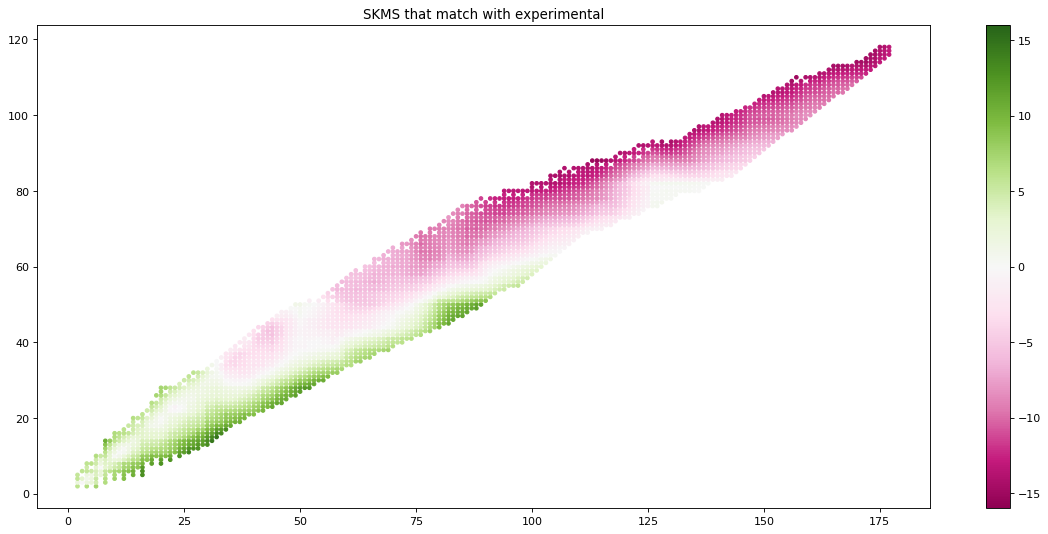

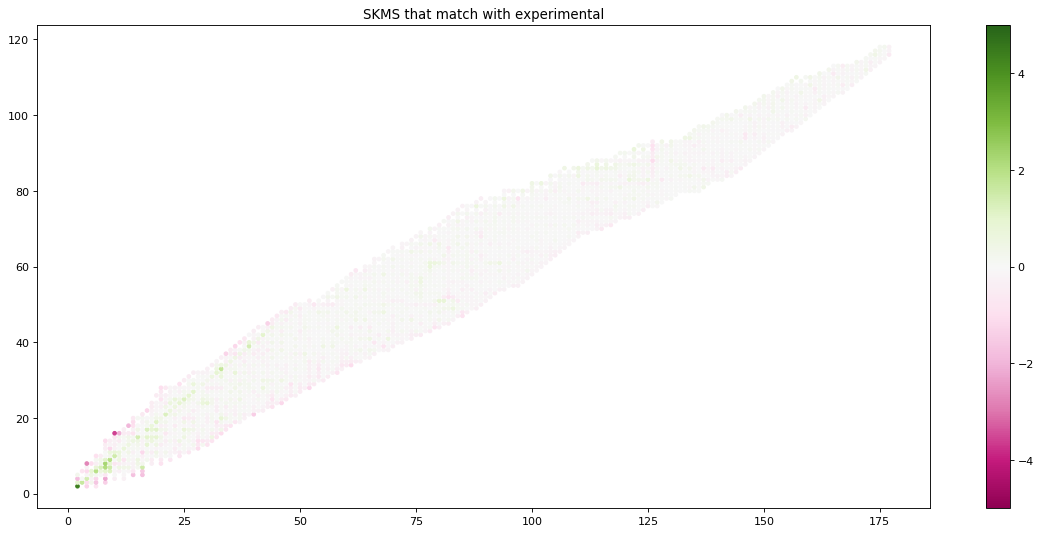

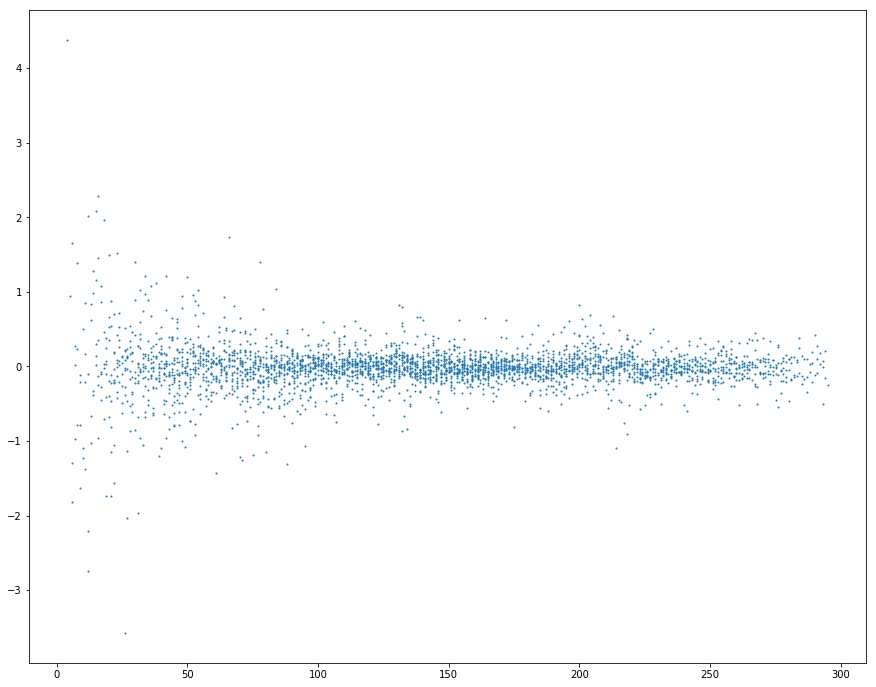

In [20]:

ext = np.int(np.ceil(max(-np.min(y_err_ml),np.max(y_err_ml))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X_matSKMS)[1],np.transpose(X_matSKMS)[0],c=y_err_ml,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.title('SKMS that match with experimental')
plt.colorbar(sc)
plt.show()

ml_err=y_err_ml-y_err


ext = np.int(np.ceil(max(-np.min(ml_err),np.max(ml_err))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X_matSKMS)[1],np.transpose(X_matSKMS)[0],c=ml_err,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.title('SKMS that match with experimental')
plt.colorbar(sc)
plt.show()

plt.plot(np.transpose(X_matSKMS)[1]+np.transpose(X_matSKMS)[0], ml_err, 'o', markersize=1)
plt.show()

    Symbol     Z      N      A     Binding_Energy_(MeV)      S_p_(MeV)     S_{2p}_(MeV)      S_n_(MeV)    S_{2n}_(MeV)    Q_{alpha}_(MeV)
    N
    O        8      4      12          -67.401491         3.202265        0.452513        24.502171     41.371293          -6.298477          
    O        8      5      13          -82.765713         5.545466        5.229510        15.364222     39.866394          -8.654052          
    O        8      6      14          -103.906436        7.661603        9.552380        21.140723     36.504945          -8.657458          
    O        8      7      15          -113.530325       10.052935       14.440822         9.623889     30.764612          -7.694122          
    O        8      8      16          -128.856436       12.316247       19.073224        15.326111     24.950000          -6.202380          
    O        8      9      17          -134.453145       14.227616       23.019749         5.596709     20.922820          -7.063642          
    O        8     10      18          -144.746257       16.024750       26.737805        10.293112     15.889821          -6.663045          
    O        8     11      19          -149.520233       17.844239       30.475626         4.773976     15.067089          -9.786837          
    O        8     12      20          -158.460613       19.542364       33.970717         8.940380     13.714356         -12.152161          
    O        8     13      21          -162.407278       21.067000       37.126395         3.946665     12.887045         -15.062670          
    O        8     14      22          -170.486446       22.517738       40.134280         8.079168     12.025833         -17.696550          
    O        8     15      23          -172.608893       23.775741       42.741015         2.122447     10.201615         -19.028010          
    O        8     16      24          -178.908577       24.951404       45.183070         6.299684      8.422131         -20.256411          
    O        8     18      26          -180.984737       27.084127       49.551022         2.946946      2.076160         -18.959230          
    O        8     20      28          -181.364441       29.019363       53.502609         1.907155      0.379704         -21.630726          

In [21]:
O_N=[]
O_A=[]
O_Be=[]
O_Sp=[]
O_2Sp=[]
O_Sn=[]
O_2Sn=[]
O_Q=[]

Ca_N=[]
Ca_A=[]
Ca_Be=[]
Ca_Sp=[]
Ca_2Sp=[]
Ca_Sn=[]
Ca_2Sn=[]
Ca_Q=[]

Ni_N=[]
Ni_A=[]
Ni_Be=[]
Ni_Sp=[]
Ni_2Sp=[]
Ni_Sn=[]
Ni_2Sn=[]
Ni_Q=[]

Sn_N=[]
Sn_A=[]
Sn_Be=[]
Sn_Sp=[]
Sn_2Sp=[]
Sn_Sn=[]
Sn_2Sn=[]
Sn_Q=[]


for i in range(53, 68):
    O_N.append(N_SKMS[i])
    O_A.append(A_SKMS[i])
    O_Be.append(y_SKMS[i])
    O_Sp.append(S_p_SKMS[i])
    O_2Sp.append(S_2p_SKMS[i])
    O_Sn.append(S_n_SKMS[i])
    O_2Sn.append(S_2n_SKMS[i])
    O_Q.append(Q_SKMS[i])
    

for i in range(347, 386):
    Ca_N.append(N_SKMS[i])
    Ca_A.append(A_SKMS[i])
    Ca_Be.append(y_SKMS[i])
    Ca_Sp.append(S_p_SKMS[i])
    Ca_2Sp.append(S_2p_SKMS[i])
    Ca_Sn.append(S_n_SKMS[i])
    Ca_2Sn.append(S_2n_SKMS[i])
    Ca_Q.append(Q_SKMS[i])
    

for i in range(667, 712):
    Ni_N.append(N_SKMS[i])
    Ni_A.append(A_SKMS[i])
    Ni_Be.append(y_SKMS[i])
    Ni_Sp.append(S_p_SKMS[i])
    Ni_2Sp.append(S_2p_SKMS[i])
    Ni_Sn.append(S_n_SKMS[i])
    Ni_2Sn.append(S_2n_SKMS[i])
    Ni_Q.append(Q_SKMS[i])
    

for i in range(1942, 2022):
    Sn_N.append(N_SKMS[i])
    Sn_A.append(A_SKMS[i])
    Sn_Be.append(y_SKMS[i])
    Sn_Sp.append(S_p_SKMS[i])
    Sn_2Sp.append(S_2p_SKMS[i])
    Sn_Sn.append(S_n_SKMS[i])
    Sn_2Sn.append(S_2n_SKMS[i])
    Sn_Q.append(Q_SKMS[i])
    

    

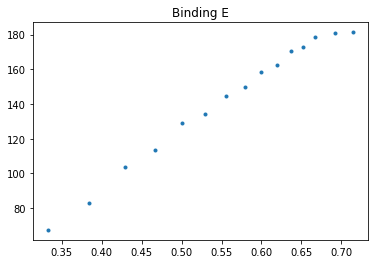

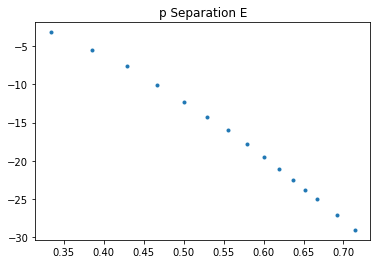

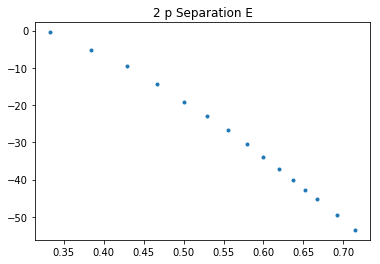

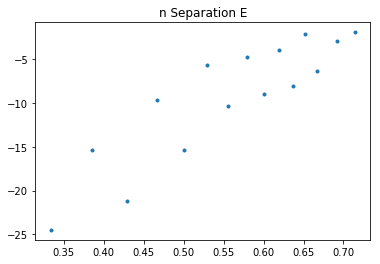

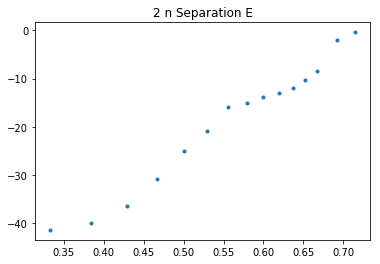

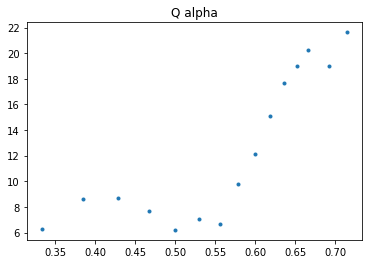

In [18]:
O_ratio=np.array(O_N)/np.array(O_A)

plt.plot(O_ratio, O_Be, 'o', markersize=3)
plt.title('Binding E')
plt.show()


plt.plot(O_ratio, O_Sp, 'o', markersize=3)
plt.title('p Separation E')
plt.show()

plt.plot(O_ratio, O_2Sp, 'o', markersize=3)
plt.title('2 p Separation E')
plt.show()


plt.plot(O_ratio, O_Sn, 'o', markersize=3)
plt.title('n Separation E')
plt.show()

plt.plot(O_ratio, O_2Sn, 'o', markersize=3)
plt.title('2 n Separation E')
plt.show()


plt.plot(O_ratio, O_Q, 'o', markersize=3)
plt.title('Q alpha')
plt.show()

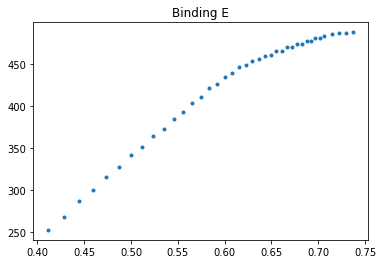

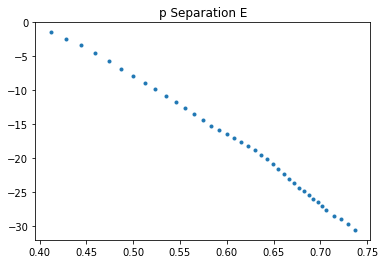

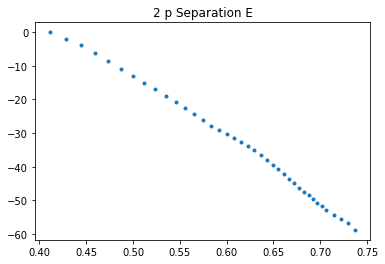

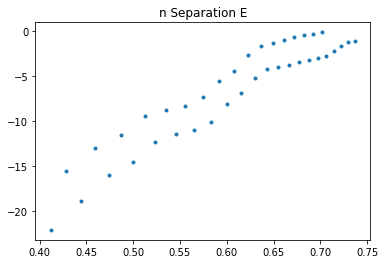

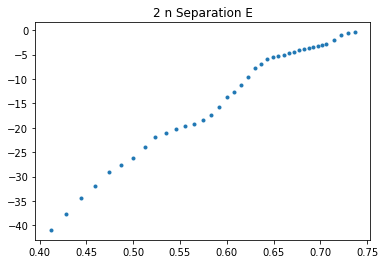

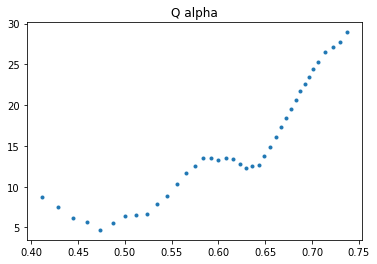

In [19]:
Ca_ratio=np.array(Ca_N)/np.array(Ca_A)


plt.plot(Ca_ratio, Ca_Be, 'o', markersize=3)
plt.title('Binding E')
plt.show()


plt.plot(Ca_ratio, Ca_Sp, 'o', markersize=3)
plt.title('p Separation E')
plt.show()

plt.plot(Ca_ratio, Ca_2Sp, 'o', markersize=3)
plt.title('2 p Separation E')
plt.show()


plt.plot(Ca_ratio, Ca_Sn, 'o', markersize=3)
plt.title('n Separation E')
plt.show()

plt.plot(Ca_ratio, Ca_2Sn, 'o', markersize=3)
plt.title('2 n Separation E')
plt.show()


plt.plot(Ca_ratio, Ca_Q, 'o', markersize=3)
plt.title('Q alpha')
plt.show()

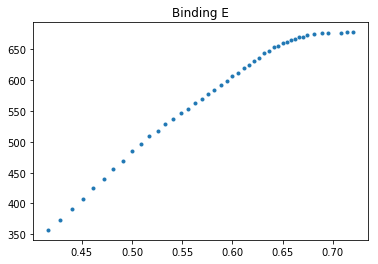

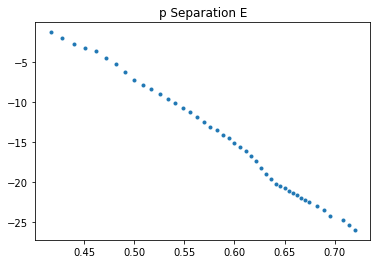

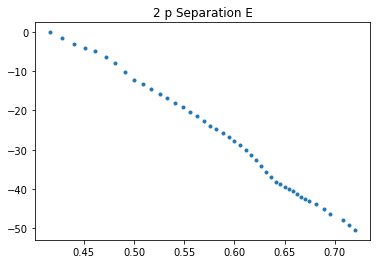

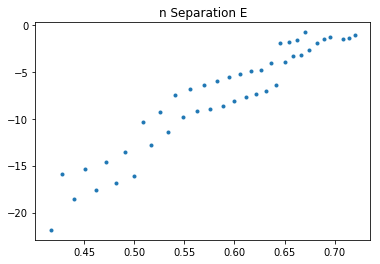

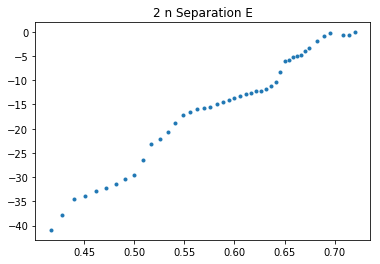

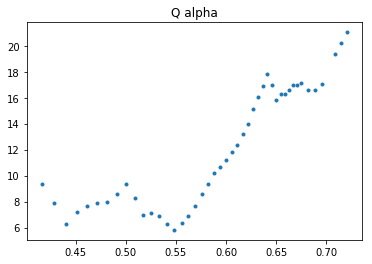

In [20]:
Ni_ratio=np.array(Ni_N)/np.array(Ni_A)


plt.plot(Ni_ratio, Ni_Be, 'o', markersize=3)
plt.title('Binding E')
plt.show()


plt.plot(Ni_ratio, Ni_Sp, 'o', markersize=3)
plt.title('p Separation E')
plt.show()

plt.plot(Ni_ratio, Ni_2Sp, 'o', markersize=3)
plt.title('2 p Separation E')
plt.show()


plt.plot(Ni_ratio, Ni_Sn, 'o', markersize=3)
plt.title('n Separation E')
plt.show()

plt.plot(Ni_ratio, Ni_2Sn, 'o', markersize=3)
plt.title('2 n Separation E')
plt.show()


plt.plot(Ni_ratio, Ni_Q, 'o', markersize=3)
plt.title('Q alpha')
plt.show()

0.9997079122952888
0.9968717509582359


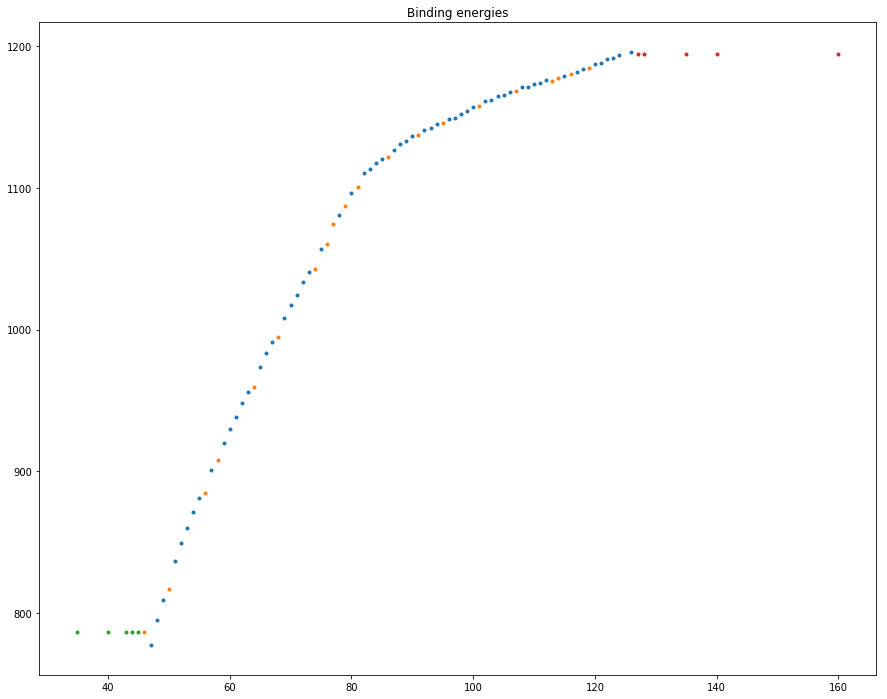

"\n\n\nplt.plot(Sn_N, Sn_Sp, 'o', markersize=3)\nplt.title('p Separation E')\nplt.show()\n\nplt.plot(Sn_N, Sn_2Sp, 'o', markersize=3)\nplt.title('2 p Separation E')\nplt.show()\n\n\nplt.plot(Sn_N, Sn_Sn, 'o', markersize=3)\nplt.title('n Separation E')\nplt.show()\n\nplt.plot(Sn_N, Sn_2Sn, 'o', markersize=3)\nplt.title('2 n Separation E')\nplt.show()\n\nplt.plot(Sn_N, Sn_Q, 'o', markersize=3)\n#plt.plot(Ni_ratio, Ni_Q, 'o', markersize=3)\n#plt.plot(Ca_ratio, Ca_Q, 'o', markersize=3)\n#plt.plot(O_ratio,  O_Q, 'o', markersize=3)\nplt.title('Q alpha')\nplt.show()\n"

In [23]:
Sn_ratio=np.array(Sn_N)/np.array(Sn_A)
z_l=[]

for i in range(0,len(Sn_N)):
    z_l.append(50)

Sn_NZ=np.transpose(np.stack([Sn_N,z_l]))



X_train, X_test, y_train, y_test = train_test_split(Sn_NZ, Sn_Be, test_size =0.25, random_state=42 )

rf_SKMS.fit(X_train, y_train)
print(rf_SKMS.score(X_train, y_train))
print(rf_SKMS.score(X_test, y_test))

Sn_Be_pred=rf_SKMS.predict(X_test)


low_test=[[45, 50],[44, 50], [43, 50], [40, 50], [35, 50]]
low_test=np.array(low_test)
low_test_pred=rf_SKMS.predict(low_test)

high_test=[[127, 50],[128, 50], [135, 50], [140, 50], [160, 50]]
high_test=np.array(high_test)
high_test_pred=rf_SKMS.predict(high_test)

plt.plot(np.transpose(X_train)[0], y_train, 'o', markersize=3)
plt.plot(np.transpose(X_test)[0], Sn_Be_pred, 'o', markersize=3)
plt.plot(np.transpose(low_test)[0], low_test_pred, 'o', markersize=3)
plt.plot(np.transpose(high_test)[0],  high_test_pred, 'o', markersize=3)
plt.title('Binding energies')
plt.show()




"""


plt.plot(Sn_N, Sn_Sp, 'o', markersize=3)
plt.title('p Separation E')
plt.show()

plt.plot(Sn_N, Sn_2Sp, 'o', markersize=3)
plt.title('2 p Separation E')
plt.show()


plt.plot(Sn_N, Sn_Sn, 'o', markersize=3)
plt.title('n Separation E')
plt.show()

plt.plot(Sn_N, Sn_2Sn, 'o', markersize=3)
plt.title('2 n Separation E')
plt.show()

plt.plot(Sn_N, Sn_Q, 'o', markersize=3)
#plt.plot(Ni_ratio, Ni_Q, 'o', markersize=3)
#plt.plot(Ca_ratio, Ca_Q, 'o', markersize=3)
#plt.plot(O_ratio,  O_Q, 'o', markersize=3)
plt.title('Q alpha')
plt.show()
"""

0.9998010994989712
0.9982774882440701


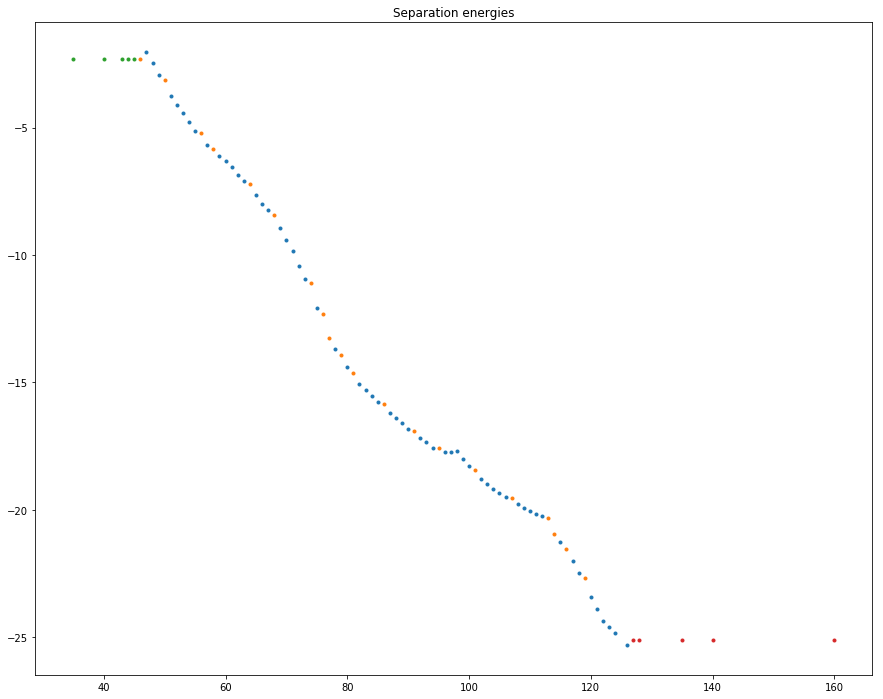

In [25]:
Sn_ratio=np.array(Sn_N)/np.array(Sn_A)
z_l=[]



for i in range(0,len(Sn_N)):
    z_l.append(50)

Sn_NZ=np.transpose(np.stack([Sn_N,z_l]))





X_train, X_test, y_train, y_test = train_test_split(Sn_NZ, Sn_Sp, test_size =0.25, random_state=42 )

rf_SKMS.fit(X_train, y_train)
print(rf_SKMS.score(X_train, y_train))
print(rf_SKMS.score(X_test, y_test))

Sn_Sp_pred=rf_SKMS.predict(X_test)


low_test=[[45, 50],[44, 50], [43, 50], [40, 50], [35, 50]]
low_test=np.array(low_test)
low_test_pred=rf_SKMS.predict(low_test)

high_test=[[127, 50],[128, 50], [135, 50], [140, 50], [160, 50]]
high_test=np.array(high_test)
high_test_pred=rf_SKMS.predict(high_test)

plt.plot(np.transpose(X_train)[0], y_train, 'o', markersize=3)
plt.plot(np.transpose(X_test)[0], Sn_Sp_pred, 'o', markersize=3)
plt.plot(np.transpose(low_test)[0], low_test_pred, 'o', markersize=3)
plt.plot(np.transpose(high_test)[0],  high_test_pred, 'o', markersize=3)
plt.title('Separation energies')
plt.show()


In [ ]:
#31220
#meeting reschedule to 2 pm 
"""    



#add the ml component to the binding energies at a certain n value of Sn
#find change the new binding energies with added ml component
for n in range nmin nmac
    nlist.append(n)
    sn=sn_dict[z,n]
    be_prev=be_dict[z,n-1]+rf.predict
    be=  be_dict[z,n]+rf.predict

    sn_plus=beprev-be
    sn_list.append(Sn)
    Sn_ml.append()
    
    plt(n_list, sn_list)
    plt(N_list, sn_ml)
"""    


for i in range(0,len(Sn_N)):
    z_l.append(50)

Sn_NZ=np.transpose(np.stack([Sn_N,z_l]))



X_train, X_test, y_train, y_test = train_test_split(Sn_NZ, Sn_Be, test_size =0.25, random_state=42 )

rf_SKMS.fit(X_train, y_train)
print(rf_SKMS.score(X_train, y_train))
print(rf_SKMS.score(X_test, y_test))

for i in range(1,len(Sn_N)):
    be_prev=rf_SKMS.predict(Sn_NZ[i-1])
    be=rf_SKMS.predict(Sn_NZ[i])
    
#find all the experimental n values of z=20
#find all the SKMS         n values of z=20
#create an rf object trained on difference between exp be and the be
#for all the the n values of z=20 find the separation energy by adding the ml prediction to the skms be value
#for each be value comparte to the separation skms n separation value ++++++++++++++++++++++++++++++++++++++

it should look
    

